<a href="https://colab.research.google.com/github/GopalTanwar7424/Text_to_Image_Generator/blob/main/Text_to_Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [ ]:
!pip show torch

In [ ]:
!pip install diffusers --upgrade


In [ ]:
import torch
print(torch.cuda.is_available())


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)

pipe = pipe.to("cuda")  #


In [ ]:
prompt1 = """A girl standing in rain
"""

In [ ]:
image = pipe(prompt1).images[0]

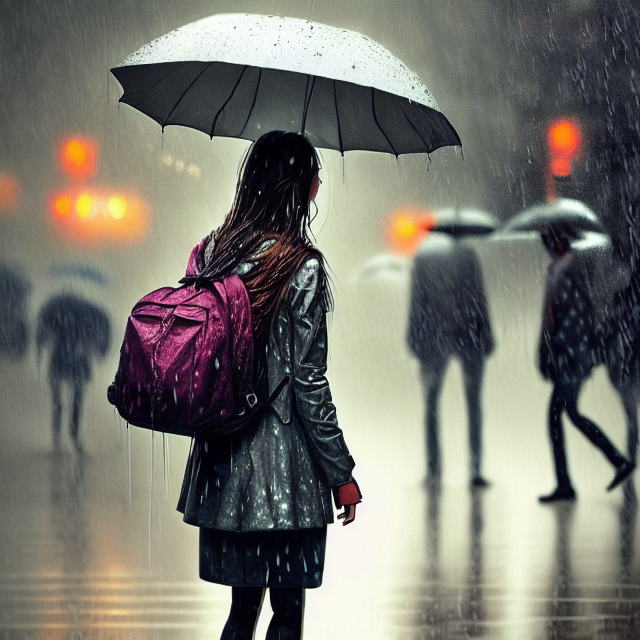

In [24]:
image

In [ ]:
prompt2="""A colourful sunset over the beach
"""

In [ ]:
image = pipe(prompt2).images[0]

In [ ]:
image

In [ ]:
prompt15="""Train in rain
"""
image = pipe(prompt15).images[0]
image

In [ ]:
import matplotlib.pyplot as plt

print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

In [ ]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [ ]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

In [ ]:
generate_image(pipe, prompt, params)

In [ ]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

In [ ]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)